---

_You are currently looking at **version 1.0** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-machine-learning/resources/bANLa) course resource._

---

# Applied Machine Learning: Module 4 (Supervised Learning, Part II)

## Preamble and Datasets

In [1]:
# %matplotlib notebook
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification, make_blobs
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_breast_cancer
from adspy_shared_utilities import load_crime_dataset

cmap_bold = ListedColormap(['#FFFF00', '#00FF00', '#0000FF','#000000'])

# fruits dataset
fruits = pd.read_table('data/fruit_data_with_colors.txt')
fruits.head()

c:\Users\luisa\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [2]:
feature_names_fruits = ['height', 'width', 'mass', 'color_score']
X_fruits = fruits[feature_names_fruits]
y_fruits = fruits['fruit_label']
target_names_fruits = ['apple', 'mandarin', 'orange', 'lemon']

X_fruits_2d = fruits[['height', 'width']]
y_fruits_2d = fruits['fruit_label']

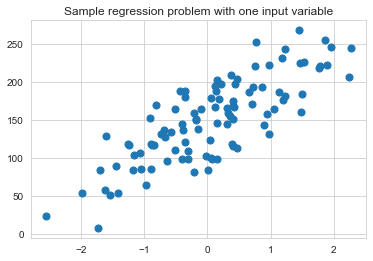

In [3]:
# synthetic dataset for simple regression
from sklearn.datasets import make_regression

plt.figure()
plt.title('Sample regression problem with one input variable')
X_R1, y_R1 = make_regression(n_samples=100, n_features=1,
                             n_informative=1, bias=150.0,
                             noise=30, random_state=0)
plt.scatter(X_R1, y_R1, marker='o', s=50)
plt.show()

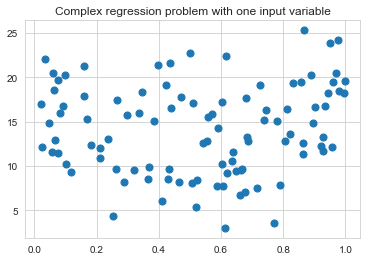

In [4]:
# synthetic dataset for more complex regression
from sklearn.datasets import make_friedman1

plt.figure()
plt.title('Complex regression problem with one input variable')
X_F1, y_F1 = make_friedman1(n_samples=100, n_features=7,
                            random_state=0)
plt.scatter(X_F1[:, 2], y_F1, marker= 'o', s=50)
plt.show()

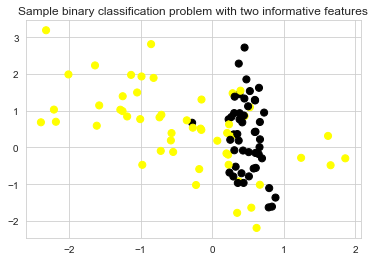

In [5]:
# synthetic dataset for classification (binary)
plt.figure()
plt.title('Sample binary classification problem with two informative features')
X_C2, y_C2 = make_classification(n_samples=100, n_features=2,
                                 n_redundant=0, n_informative=2,
                                 n_clusters_per_class=1, flip_y=0.1,
                                 class_sep=0.5, random_state=0)
plt.scatter(X_C2[:, 0], X_C2[:, 1], marker='o',
           c=y_C2, s=50, cmap=cmap_bold)
plt.show()

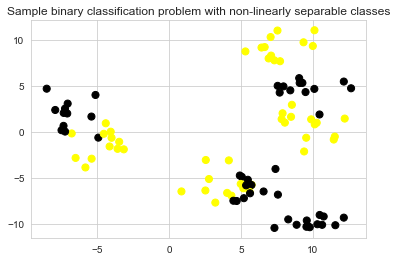

In [6]:
# more difficult synthetic dataset for classification (binary)
# with classes that are not linearly separable
X_D2, y_D2 = make_blobs(n_samples=100, n_features=2,
                        centers=8, cluster_std=1.3,
                        random_state=4)
y_D2 = y_D2 % 2

plt.figure()
plt.title('Sample binary classification problem with non-linearly separable classes')
plt.scatter(X_D2[:, 0], X_D2[:, 1], c=y_D2,
            marker='o', s=50, cmap=cmap_bold)
plt.show()

In [8]:
# Breast cancer dataset for classification
cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y=True)
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [10]:
# Communities and Crime dataset
(X_crime, y_crime) = load_crime_dataset()
pd.concat([X_crime, y_crime], axis=1).head()

,population,householdsize,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,medIncome,pctWWage,...,MedOwnCostPctInc,MedOwnCostPctIncNoMtg,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,ViolentCrimesPerPop
0,11980,3.10,12.47,21.44,10.93,11.33,11980,100.0,75122,89.24,...,21.1,14.0,11,0,10.66,53.72,65.29,78.09,89.14,41.02
1,23123,2.82,11.01,21.30,10.48,17.18,23123,100.0,47917,78.99,...,20.7,12.5,0,0,8.30,77.17,71.27,90.22,96.12,127.56
2,29344,2.43,11.36,25.88,11.01,10.28,29344,100.0,35669,82.00,...,21.7,11.6,16,0,5.00,44.77,36.60,61.26,82.85,218.59
3,16656,2.40,12.55,25.20,12.19,17.57,0,0.0,20580,68.15,...,20.6,14.5,0,0,2.04,88.71,56.70,90.17,96.24,306.64
5,140494,2.45,18.09,32.89,20.04,13.26,140494,100.0,21577,75.78,...,17.3,11.7,327,4,1.49,64.35,42.29,70.61,85.66,442.95


## Naive Bayes classifiers

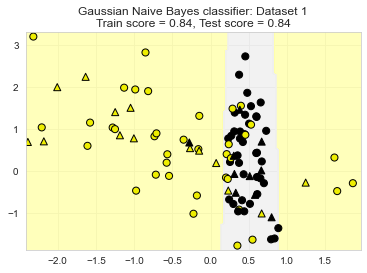

In [11]:
from sklearn.naive_bayes import GaussianNB
from adspy_shared_utilities import plot_class_regions_for_classifier

X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2, random_state=0)

nbclf = GaussianNB().fit(X_train, y_train)
plot_class_regions_for_classifier(nbclf, X_train, y_train, X_test, y_test, 'Gaussian Naive Bayes classifier: Dataset 1')

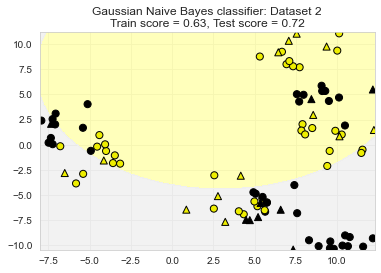

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state=0)

nbclf = GaussianNB().fit(X_train, y_train)
plot_class_regions_for_classifier(nbclf, X_train, y_train, X_test, y_test, 'Gaussian Naive Bayes classifier: Dataset 2')

### Application to a real-world dataset

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state=0)

nbclf = GaussianNB().fit(X_train, y_train)
print('Breast cancer dataset')
print('Accuracy of GaussianNB classifier on training set: {:.2f}'.format(nbclf.score(X_train, y_train)))
print('Accuracy of GaussianNB classifier on test set: {:.2f}'.format(nbclf.score(X_test, y_test)))

Breast cancer dataset
Accuracy of GaussianNB classifier on training set: 0.95
Accuracy of GaussianNB classifier on test set: 0.94


## Ensembles of Decision Trees

### Random forests

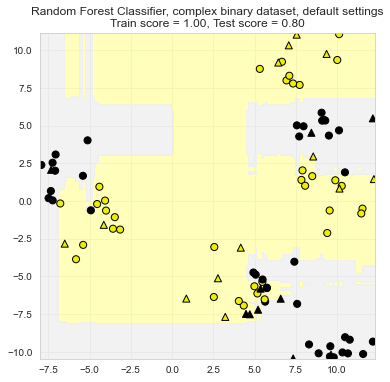

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot

X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state=0)

fig, subaxes = plt.subplots(1, 1, figsize=(6, 6))
clf = RandomForestClassifier().fit(X_train, y_train)
title = 'Random Forest Classifier, complex binary dataset, default settings'
plot_class_regions_for_classifier_subplot(clf, X_train, y_train, X_test, y_test, title, subaxes)
plt.show()

### Random forest: Fruit dataset

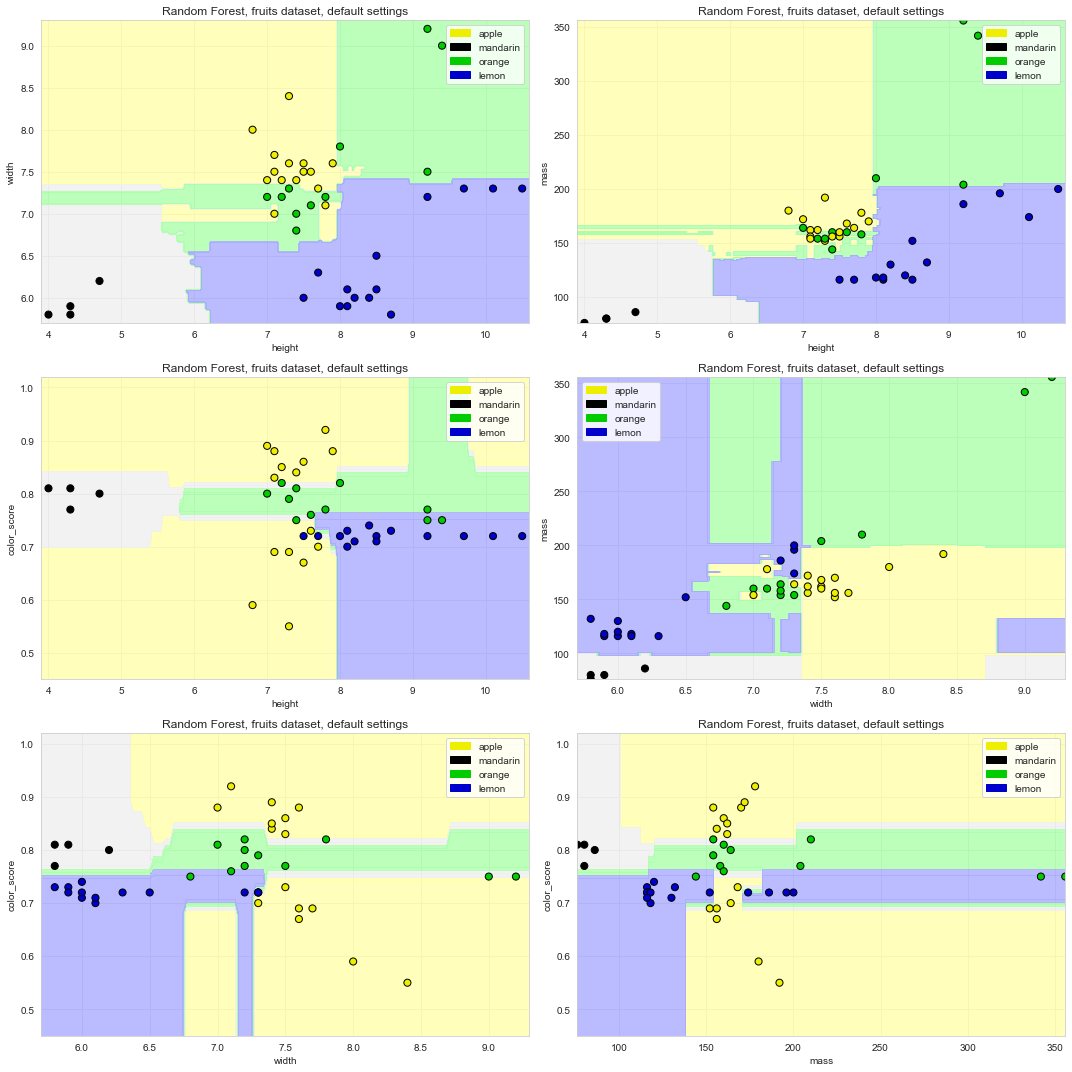

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot

X_train, X_test, y_train, y_test = train_test_split(X_fruits.to_numpy(),
                                                    y_fruits.to_numpy(),
                                                    random_state=0)

fig, subaxes = plt.subplots(3, 2, figsize=(15, 15))
title = 'Random Forest, fruits dataset, default settings'
pair_list = [[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]
for pair, axis in zip(pair_list, subaxes.reshape(6,)):
    X = X_train[:, pair]
    y = y_train
    clf = RandomForestClassifier().fit(X, y)
    plot_class_regions_for_classifier_subplot(clf, X, y, None,
                                              None, title, axis,
                                              target_names_fruits)
    axis.set_xlabel(feature_names_fruits[pair[0]])
    axis.set_ylabel(feature_names_fruits[pair[1]])
plt.tight_layout()
plt.show()

In [17]:
clf = RandomForestClassifier(n_estimators=10, random_state=0).fit(X_train, y_train)

print('Random Forest, Fruit dataset, default settings')
print('Accuracy of RF classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of RF classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))

Random Forest, Fruit dataset, default settings
Accuracy of RF classifier on training set: 1.00
Accuracy of RF classifier on test set: 0.80


#### Random Forests on a real-world dataset

In [18]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state=0)

clf = RandomForestClassifier(max_features=8, random_state=0)
clf.fit(X_train, y_train)

print('Breast cancer dataset')
print('Accuracy of RF classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of RF classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))

Breast cancer dataset
Accuracy of RF classifier on training set: 1.00
Accuracy of RF classifier on test set: 0.97


### Gradient-boosted decision trees

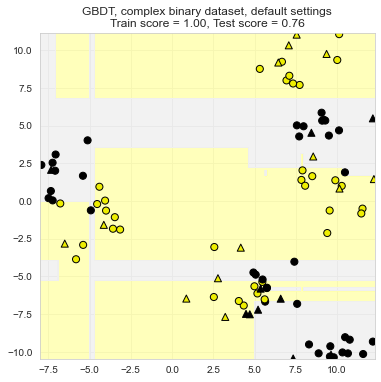

In [19]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot

X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state=0)

fig, subaxes = plt.subplots(1, 1, figsize=(6, 6))
clf = GradientBoostingClassifier().fit(X_train, y_train)
title = 'GBDT, complex binary dataset, default settings'
plot_class_regions_for_classifier_subplot(clf, X_train, y_train, X_test, y_test, title, subaxes)
plt.show()

#### Gradient boosted decision trees on the fruit dataset

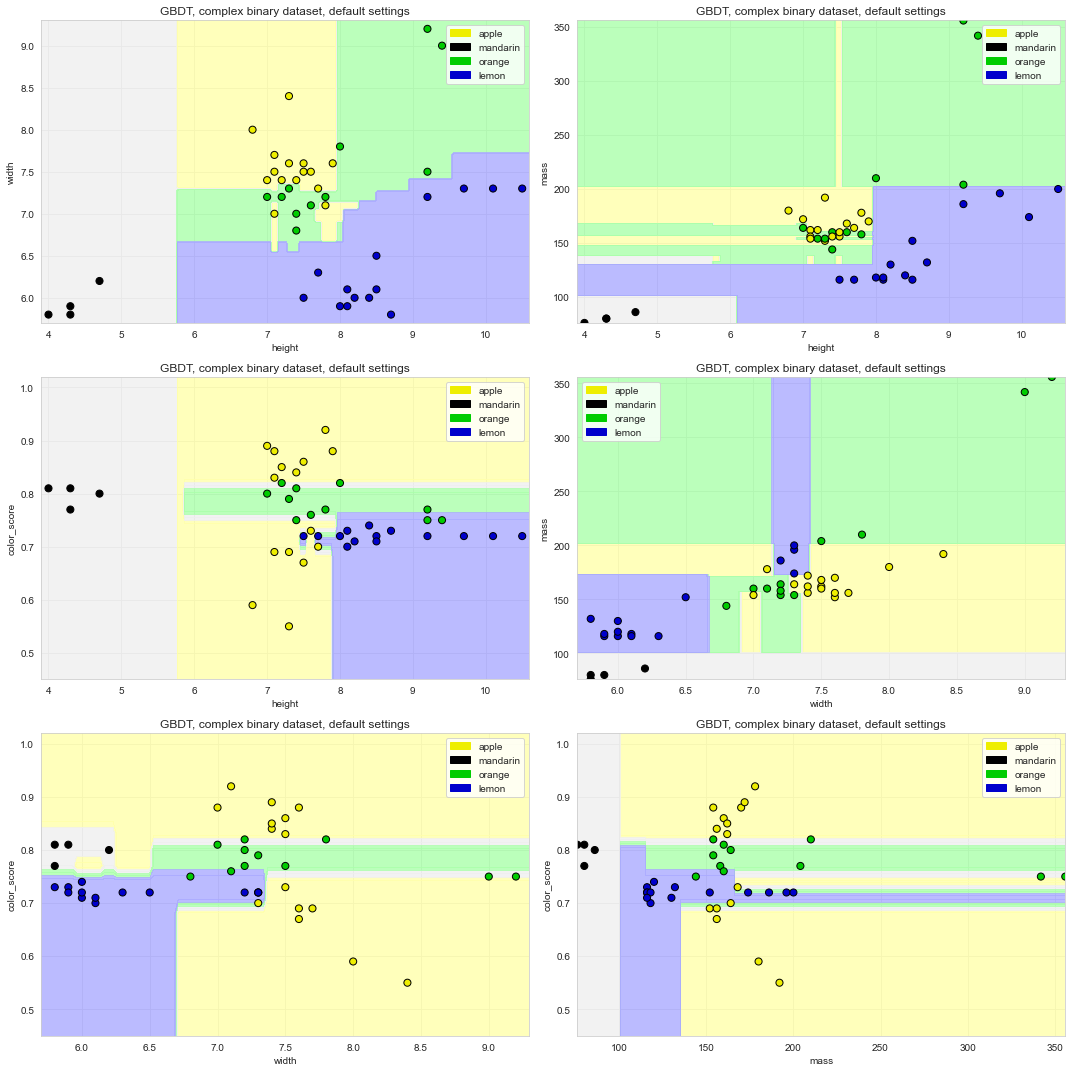

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_fruits.to_numpy(),
                                                    y_fruits.to_numpy(),
                                                    random_state=0)

fig, subaxes = plt.subplots(3, 2, figsize=(15, 15))
pair_list = [[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]
for pair, axis in zip(pair_list, subaxes.reshape(6,)):
    X = X_train[:, pair]
    y = y_train
    clf = GradientBoostingClassifier().fit(X, y)
    plot_class_regions_for_classifier_subplot(clf, X, y, None,
                                              None, title, axis,
                                              target_names_fruits)
    axis.set_xlabel(feature_names_fruits[pair[0]])
    axis.set_ylabel(feature_names_fruits[pair[1]])
plt.tight_layout()
plt.show()

In [22]:
clf = GradientBoostingClassifier().fit(X_train, y_train)

print('GBDT, Fruit dataset, default settings')
print('Accuracy of GBDT classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of GBDT classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))

GBDT, Fruit dataset, default settings
Accuracy of GBDT classifier on training set: 1.00
Accuracy of GBDT classifier on test set: 0.80


#### Gradient-boosted decision trees on a real-world dataset

In [23]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state=0)

clf = GradientBoostingClassifier(random_state=0)
clf.fit(X_train, y_train)

print('Breast cancer dataset (learning_rate=0.1, max_depth=3)')
print('Accuracy of GBDT classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of GBDT classifier on test set: {:.2f}\n'.format(clf.score(X_test, y_test)))

Breast cancer dataset (learning_rate=0.1, max_depth=3)
Accuracy of GBDT classifier on training set: 1.00
Accuracy of GBDT classifier on test set: 0.97



In [24]:
clf = GradientBoostingClassifier(learning_rate=0.01, max_depth=2, random_state=0)
clf.fit(X_train, y_train)

print('Breast cancer dataset (learning_rate=0.01, max_depth=2)')
print('Accuracy of GBDT classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of GBDT classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))

Breast cancer dataset (learning_rate=0.01, max_depth=2)
Accuracy of GBDT classifier on training set: 0.97
Accuracy of GBDT classifier on test set: 0.97


## Neural networks

#### Activation functions

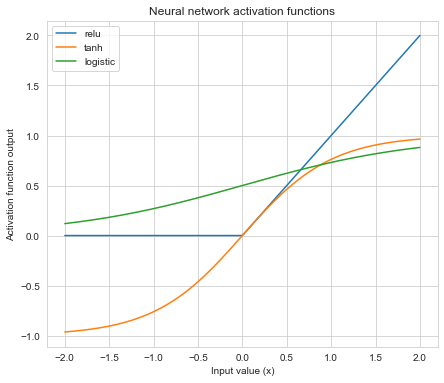

In [25]:
xrange = np.linspace(-2, 2, 200)

plt.figure(figsize=(7, 6))
plt.plot(xrange, np.maximum(xrange, 0), label='relu')
plt.plot(xrange, np.tanh(xrange), label='tanh')
plt.plot(xrange, 1 / (1 + np.exp(-xrange)), label='logistic')
plt.legend()
plt.title('Neural network activation functions')
plt.xlabel('Input value (x)')
plt.ylabel('Activation function output')
plt.show()

### Neural networks: Classification

#### Synthetic dataset 1: single hidden layer

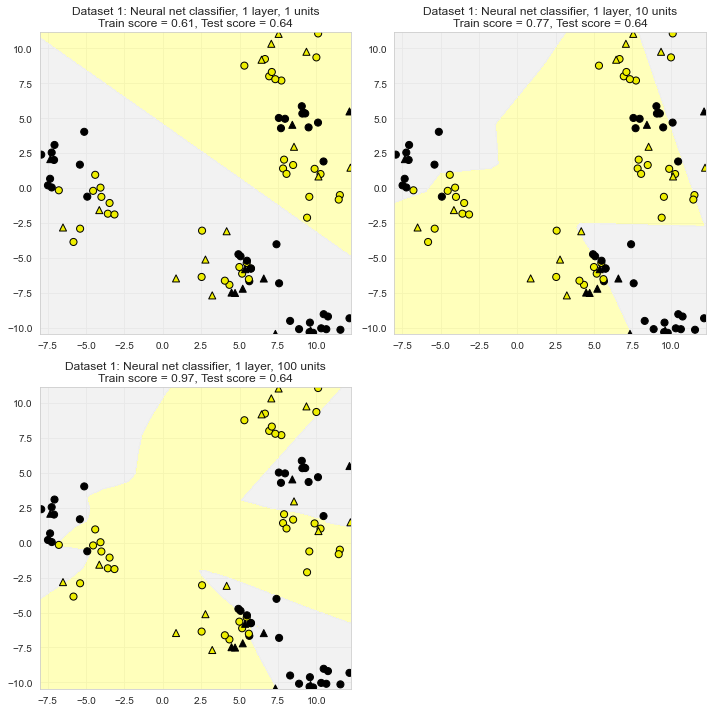

In [29]:
from sklearn.neural_network import MLPClassifier
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot

X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state=0)

fig, subaxes = plt.subplots(2, 2, figsize=(10, 10))
subaxes[1, 1].axis('off')

for units, axis in zip([1, 10, 100], subaxes.reshape(4,)):
    nnclf = MLPClassifier(hidden_layer_sizes=[units], solver='lbfgs', random_state=0, max_iter=1000).fit(X_train, y_train)
    title = 'Dataset 1: Neural net classifier, 1 layer, {} units'.format(units)
    plot_class_regions_for_classifier_subplot(nnclf, X_train, y_train,
                                              X_test, y_test, title, axis)
    plt.tight_layout()

#### Synthetic dataset 1: two hidden layers

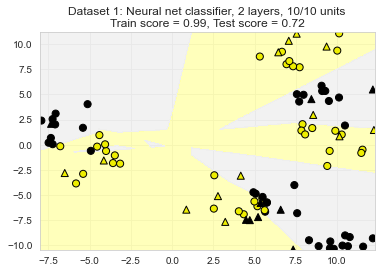

In [31]:
from adspy_shared_utilities import plot_class_regions_for_classifier

X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state=0)

nnclf = MLPClassifier(hidden_layer_sizes=[10, 10], solver='lbfgs', random_state=0, max_iter=1000).fit(X_train, y_train)

plot_class_regions_for_classifier(nnclf, X_train, y_train, X_test, y_test,
                                  'Dataset 1: Neural net classifier, 2 layers, 10/10 units')

#### Regularization parameter: alpha

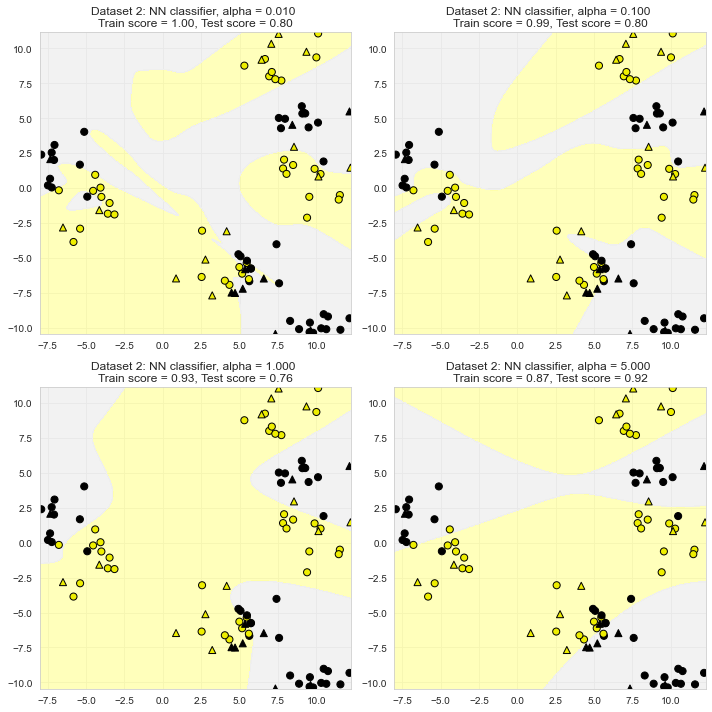

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state=0)

fig, subaxes = plt.subplots(2, 2, figsize=(10, 10))

for this_alpha, axis in zip([0.01, 0.1, 1.0, 5.0], subaxes.reshape(4,)):
    nnclf = MLPClassifier(  solver='lbfgs', activation='tanh',
                            alpha=this_alpha,
                            hidden_layer_sizes=[100, 100],
                            random_state=0, max_iter=10000).fit(X_train, y_train)
    title = 'Dataset 2: NN classifier, alpha = {:.3f} '.format(this_alpha)
    plot_class_regions_for_classifier_subplot(nnclf, X_train, y_train,
                                              X_test, y_test, title, axis)
    plt.tight_layout()

#### The effect of different choices of activation function

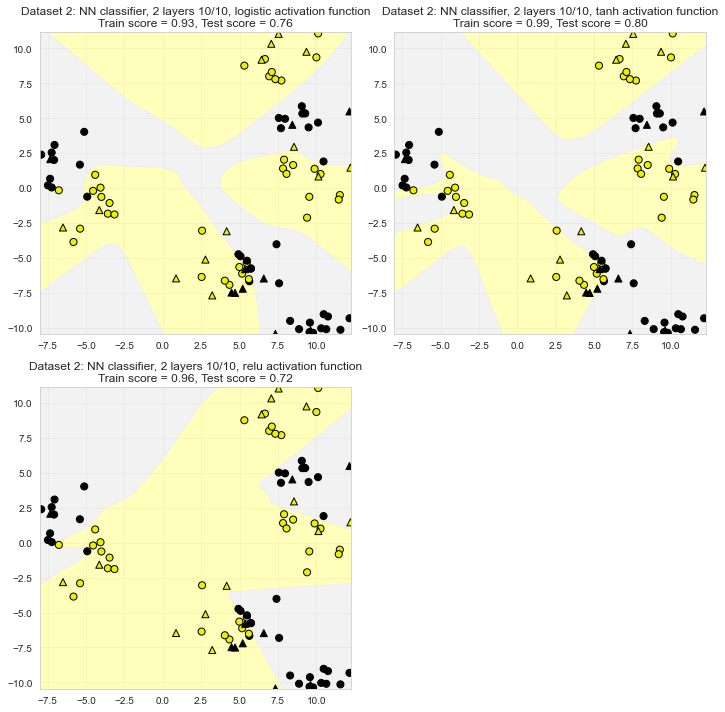

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state=0)

fig, subaxes = plt.subplots(2, 2, figsize=(10, 10))
subaxes[1, 1].axis('off')

for this_activation, axis in zip(['logistic', 'tanh', 'relu'], subaxes.reshape(4,)):
    nnclf = MLPClassifier(solver='lbfgs', activation=this_activation,
                          alpha=0.1, hidden_layer_sizes=[10, 10],
                          random_state=0, max_iter=10000).fit(X_train, y_train)
    title = 'Dataset 2: NN classifier, 2 layers 10/10, {} activation function'.format(this_activation)
    plot_class_regions_for_classifier_subplot(nnclf, X_train, y_train,
                                              X_test, y_test, title, axis)
    plt.tight_layout()

### Neural networks: Regression

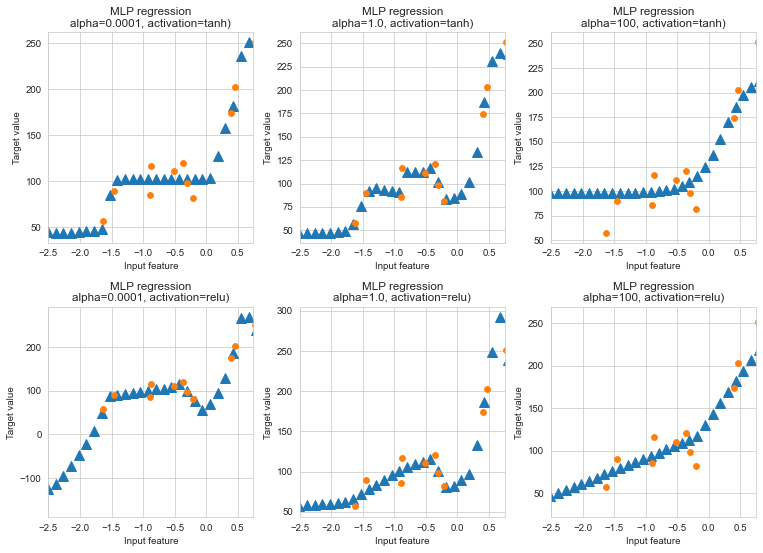

In [37]:
from sklearn.neural_network import MLPRegressor

fig, subaxes = plt.subplots(2, 3, figsize=(11, 8), dpi=70)

X_predict_input = np.linspace(-3, 3, 50).reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X_R1[0::5], y_R1[0::5], random_state=0)

for thisaxisrow, thisactivation in zip(subaxes, ['tanh', 'relu']):
    for thisalpha, thisaxis in zip([0.0001, 1.0, 100], thisaxisrow):
        mlpreg = MLPRegressor(hidden_layer_sizes=[100, 100],
                              activation=thisactivation,
                              alpha=thisalpha,
                              solver='lbfgs', max_iter=10000).fit(X_train, y_train)
        y_predict_output = mlpreg.predict(X_predict_input)
        thisaxis.set_xlim([-2.5, 0.75])
        thisaxis.plot(X_predict_input, y_predict_output, '^', markersize = 10)
        thisaxis.plot(X_train, y_train, 'o')
        thisaxis.set_xlabel('Input feature')
        thisaxis.set_ylabel('Target value')
        thisaxis.set_title('MLP regression\nalpha={}, activation={})'.format(thisalpha, thisactivation))
        plt.tight_layout()

#### Application to real-world dataset for classification

In [38]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state=0)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf = MLPClassifier(hidden_layer_sizes=[100, 100], alpha=5.0, random_state=0, solver='lbfgs').fit(X_train_scaled, y_train)
print('Breast cancer dataset')
print('Accuracy of NN classifier on training set: {:.2f}'.format(clf.score(X_train_scaled, y_train)))
print('Accuracy of NN classifier on test set: {:.2f}'.format(clf.score(X_test_scaled, y_test)))

Breast cancer dataset
Accuracy of NN classifier on training set: 0.98
Accuracy of NN classifier on test set: 0.97
